<a href="https://colab.research.google.com/github/tuanex/IANNWTF/blob/master/homework_03/homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# CNN

cnn1 = models.Sequential([
    # we only have to tell the size and the kernel size. Activation too ofc. Input shape is one image.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    # then pooling
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn2 = models.Sequential([
    # we only have to tell the size and the kernel size. Activation too ofc. Input shape is one image.
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    # then pooling
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


In [5]:
# hyperparameters
batch_size = 64
epochs = 10
# legacy for m1 macs
optimizer_adam_lr1 = optimizers.legacy.Adam(learning_rate=0.001)
optimizer_adam_lr2 = optimizers.legacy.Adam(learning_rate=0.01)
optimizer_sgd_lr1 = optimizers.legacy.SGD(learning_rate=0.001)
optimizer_sgd_lr2 = optimizers.legacy.SGD(learning_rate=0.01)

In [6]:
# training the model
def train_model(opt,epochs,architecture):
    #one layer cnn
    if architecture == "cnn1":
        cnn1.compile(optimizer=opt,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
        history = cnn1.fit(x_train, y_train, epochs=epochs , batch_size=batch_size, validation_data=(x_test, y_test))
        return history
    # three layer cnn
    elif architecture == "cnn2":
        cnn2.compile(optimizer=opt,
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
        history = cnn2.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))
        return history
    else:
        print("Wrong architecture name. Choose either cnn1 or cnn2.")

In [7]:
# plotting the results
"""
Now it is time to learn about the influence hyperparameter and training choices
can make. Try out:
• Two different Learning Rates
• Two different Architectures (e.g. number and size of layers)
• Two different optimizers (Including Adam and one other)
In total this should create 8 respective settings, for each of which we ask you to
plot:
• Training Accuracy
• Training Loss
• Test Accuracy
• Test Loss
To be explicit: This should result in a total of 8 times four plots!
"""

# gather 4 different histories
print("First model")
model_1 = train_model(optimizer_adam_lr1,epochs ,"cnn1")

# different learning rate
print("Second model")
model_2 = train_model(optimizer_adam_lr1,epochs ,"cnn2")

First model
Epoch 1/10
782/782 [==============================] - 43s 54ms/step - loss: 1.5770 - accuracy: 0.4373 - val_loss: 1.3615 - val_accuracy: 0.5105
Epoch 2/10
782/782 [==============================] - 37s 47ms/step - loss: 1.2592 - accuracy: 0.5604 - val_loss: 1.2111 - val_accuracy: 0.5716
Epoch 3/10
782/782 [==============================] - 41s 53ms/step - loss: 1.1522 - accuracy: 0.5981 - val_loss: 1.1600 - val_accuracy: 0.5880
Epoch 4/10
782/782 [==============================] - 37s 47ms/step - loss: 1.0681 - accuracy: 0.6277 - val_loss: 1.1288 - val_accuracy: 0.6098
Epoch 5/10
782/782 [==============================] - 40s 51ms/step - loss: 1.0142 - accuracy: 0.6492 - val_loss: 1.0759 - val_accuracy: 0.6257
Epoch 6/10
782/782 [==============================] - 37s 48ms/step - loss: 0.9662 - accuracy: 0.6660 - val_loss: 1.0755 - val_accuracy: 0.6248
Epoch 7/10
782/782 [==============================] - 39s 50ms/step - loss: 0.9206 - accuracy: 0.6826 - val_loss: 1.0605 - v

In [8]:
print("Third model")
model_3 = train_model(optimizer_adam_lr2,epochs,"cnn1")

print("Fourth model")
model_4 = train_model(optimizer_adam_lr2,epochs,"cnn2")

Third model
Epoch 1/10
782/782 [==============================] - 39s 49ms/step - loss: 1.4218 - accuracy: 0.5043 - val_loss: 1.3906 - val_accuracy: 0.5070
Epoch 2/10
782/782 [==============================] - 37s 48ms/step - loss: 1.2500 - accuracy: 0.5621 - val_loss: 1.3047 - val_accuracy: 0.5418
Epoch 3/10
782/782 [==============================] - 36s 45ms/step - loss: 1.1443 - accuracy: 0.5996 - val_loss: 1.2757 - val_accuracy: 0.5623
Epoch 4/10
782/782 [==============================] - 35s 45ms/step - loss: 1.0729 - accuracy: 0.6242 - val_loss: 1.3392 - val_accuracy: 0.5466
Epoch 5/10
782/782 [==============================] - 37s 47ms/step - loss: 0.9897 - accuracy: 0.6539 - val_loss: 1.2812 - val_accuracy: 0.5734
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.9314 - accuracy: 0.6753 - val_loss: 1.4531 - val_accuracy: 0.5393
Epoch 7/10
782/782 [==============================] - 39s 49ms/step - loss: 0.8753 - accuracy: 0.6935 - val_loss: 1.5163 - v

In [9]:
print("Fifth model")
model_5 = train_model(optimizer_sgd_lr1, epochs, "cnn1")

print("Sixth model")
model_6 = train_model(optimizer_sgd_lr1, epochs, "cnn2")

Fifth model
Epoch 1/10
782/782 [==============================] - 39s 49ms/step - loss: 0.5342 - accuracy: 0.8138 - val_loss: 1.5843 - val_accuracy: 0.5725
Epoch 2/10
782/782 [==============================] - 35s 44ms/step - loss: 0.5035 - accuracy: 0.8243 - val_loss: 1.6039 - val_accuracy: 0.5730
Epoch 3/10
782/782 [==============================] - 34s 44ms/step - loss: 0.4945 - accuracy: 0.8276 - val_loss: 1.6124 - val_accuracy: 0.5710
Epoch 4/10
782/782 [==============================] - 36s 46ms/step - loss: 0.4891 - accuracy: 0.8297 - val_loss: 1.6107 - val_accuracy: 0.5718
Epoch 5/10
782/782 [==============================] - 35s 44ms/step - loss: 0.4852 - accuracy: 0.8305 - val_loss: 1.6379 - val_accuracy: 0.5721
Epoch 6/10
782/782 [==============================] - 34s 43ms/step - loss: 0.4824 - accuracy: 0.8305 - val_loss: 1.6318 - val_accuracy: 0.5728
Epoch 7/10
782/782 [==============================] - 36s 46ms/step - loss: 0.4799 - accuracy: 0.8317 - val_loss: 1.6393 - v

In [10]:
print("Seventh model")
model_7 = train_model(optimizer_sgd_lr2, epochs, "cnn1")

print("Eigth model")
model_8 = train_model(optimizer_sgd_lr2, epochs, "cnn2")

Seventh model
Epoch 1/10
782/782 [==============================] - 40s 51ms/step - loss: 0.4971 - accuracy: 0.8257 - val_loss: 1.7039 - val_accuracy: 0.5662
Epoch 2/10
782/782 [==============================] - 34s 44ms/step - loss: 0.4877 - accuracy: 0.8293 - val_loss: 1.7288 - val_accuracy: 0.5668
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 0.4850 - accuracy: 0.8279 - val_loss: 1.7545 - val_accuracy: 0.5645
Epoch 4/10
782/782 [==============================] - 38s 49ms/step - loss: 0.4802 - accuracy: 0.8298 - val_loss: 1.9157 - val_accuracy: 0.5384
Epoch 5/10
782/782 [==============================] - 35s 44ms/step - loss: 0.4784 - accuracy: 0.8309 - val_loss: 1.8004 - val_accuracy: 0.5640
Epoch 6/10
782/782 [==============================] - 35s 44ms/step - loss: 0.4768 - accuracy: 0.8311 - val_loss: 1.7525 - val_accuracy: 0.5722
Epoch 7/10
782/782 [==============================] - 36s 46ms/step - loss: 0.4744 - accuracy: 0.8327 - val_loss: 1.7351 -

In [11]:
# plotting
def plotting_history(history):

    # plot train accuracy
    plt.plot(history.history["accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train"], loc="upper left")
    plt.show()

    # plot test accuracy
    plt.plot(history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Test"], loc="upper left")
    plt.show()

    # plot train loss
    plt.plot(history.history["loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train"], loc="upper left")
    plt.show()

    # plot test loss
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Test"], loc="upper left")
    plt.show()

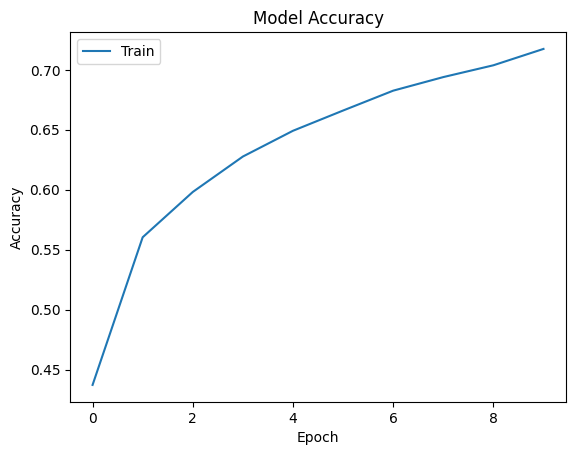

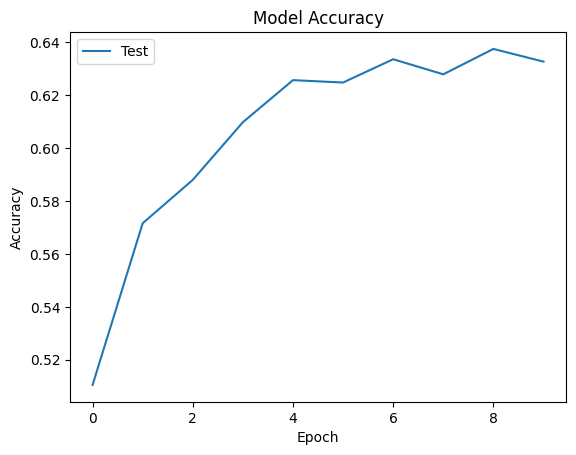

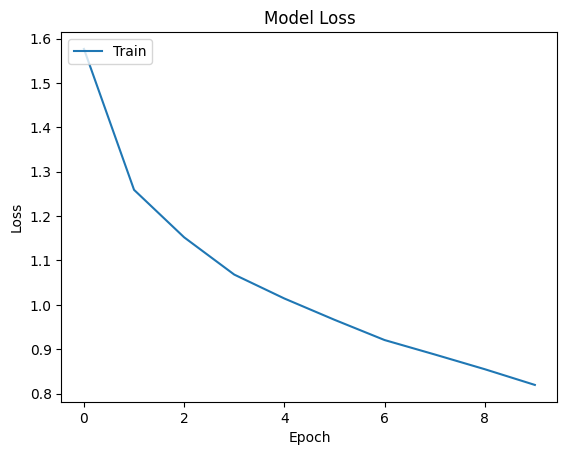

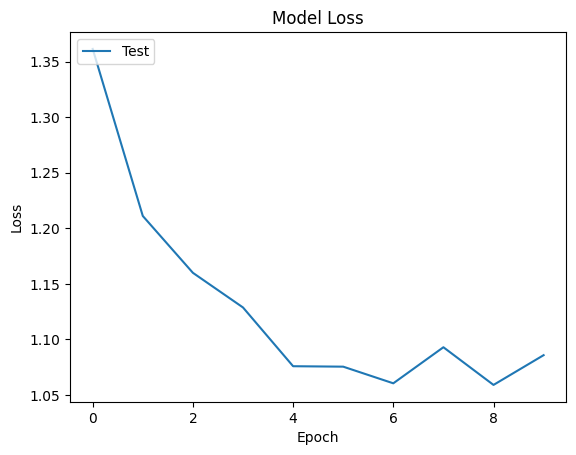

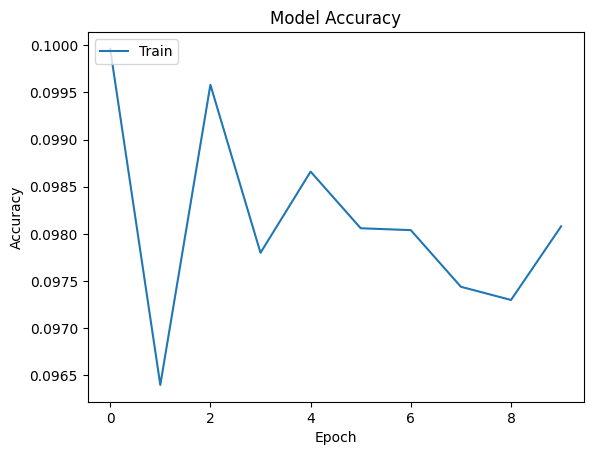

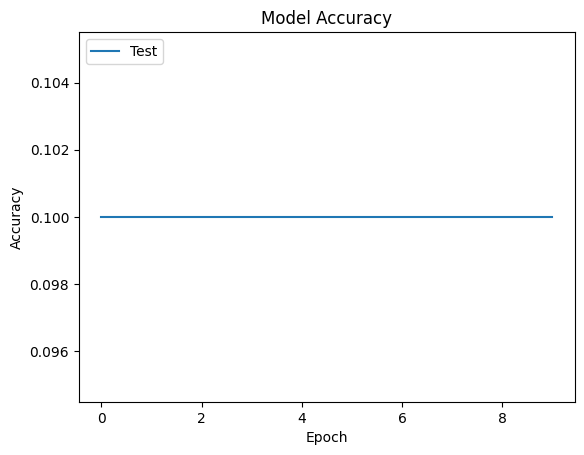

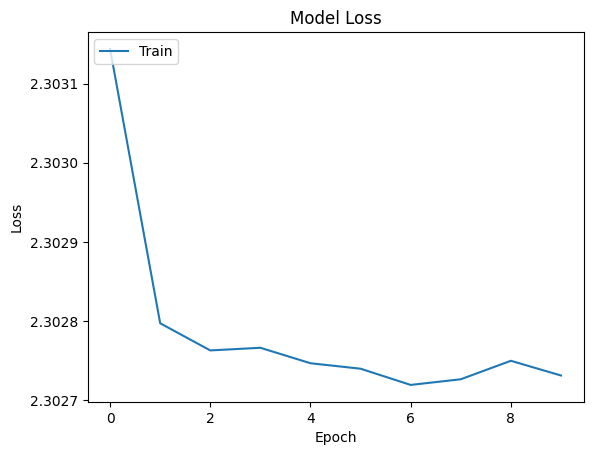

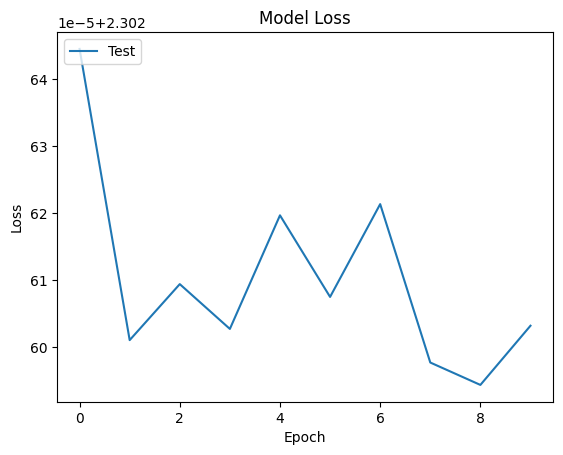

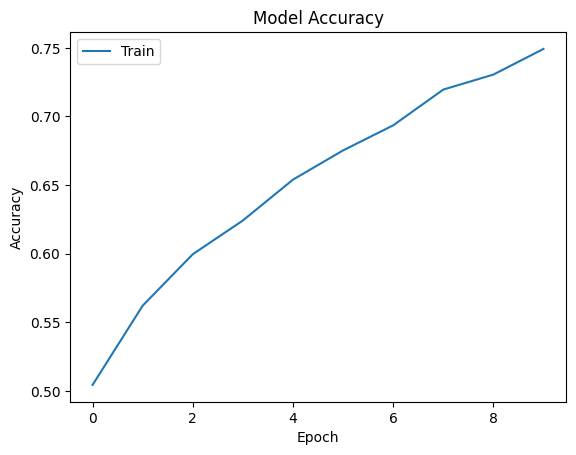

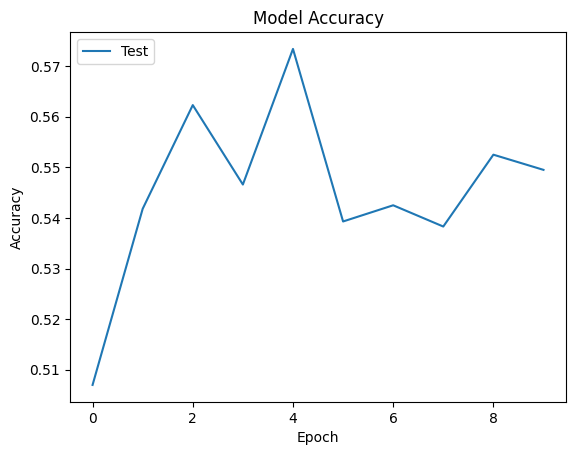

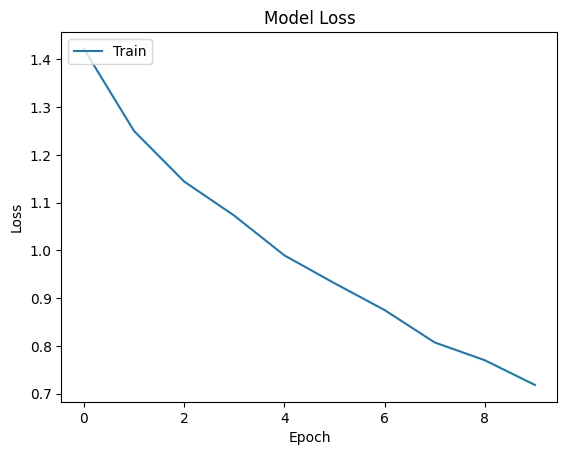

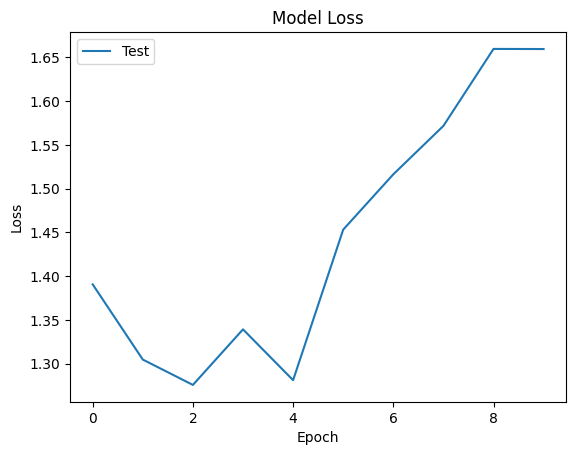

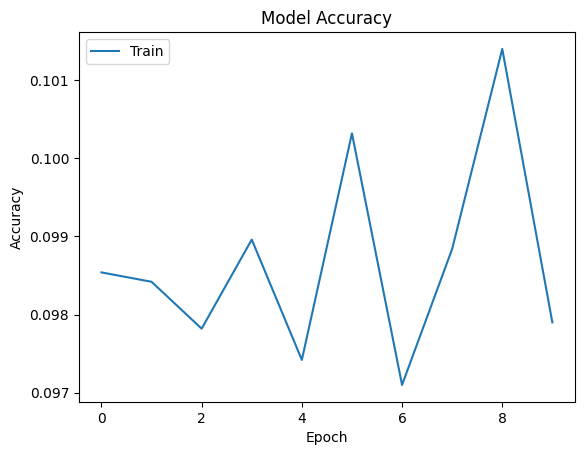

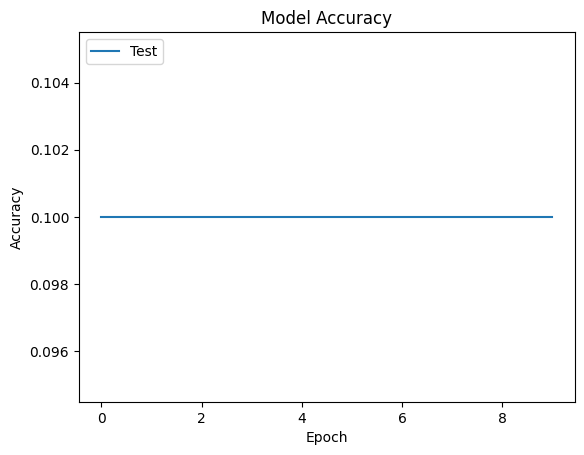

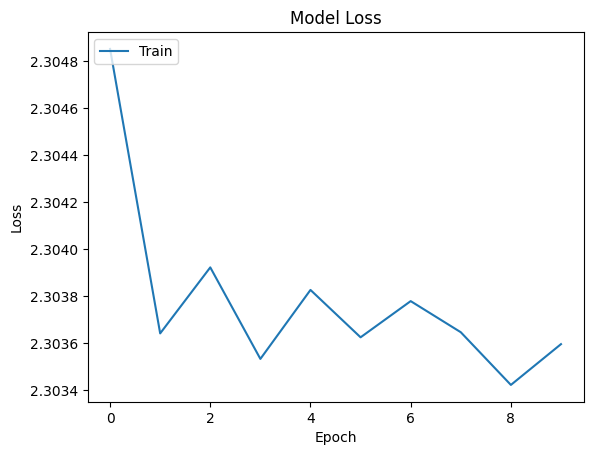

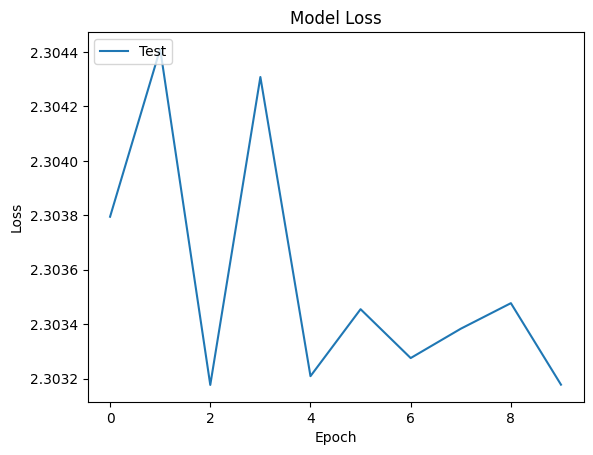

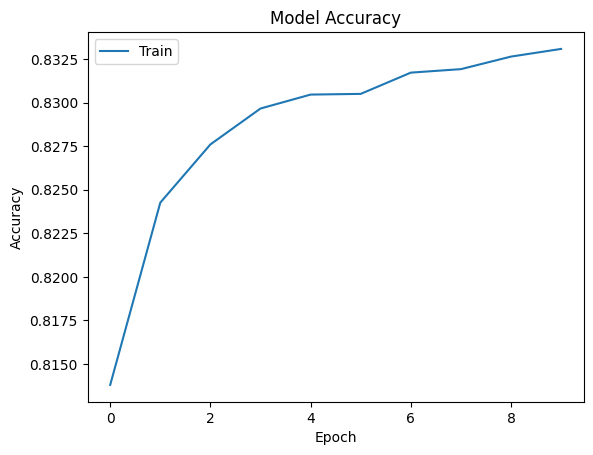

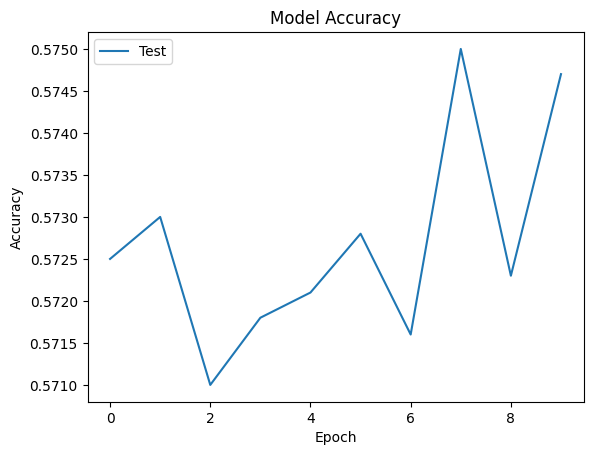

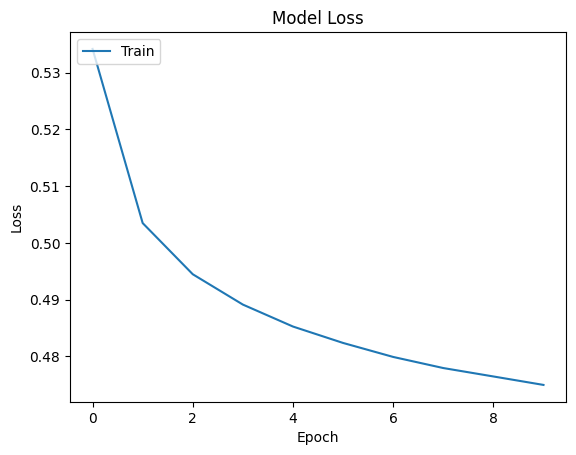

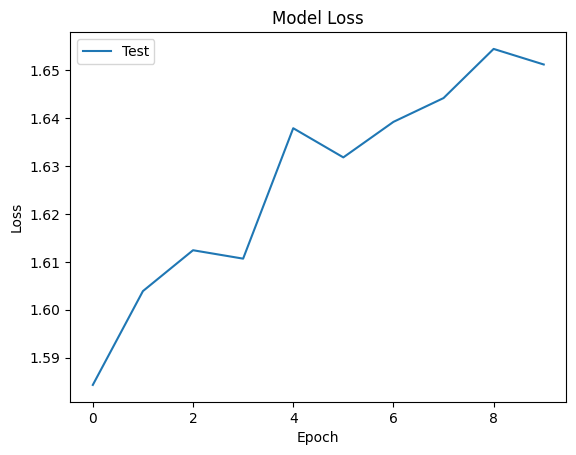

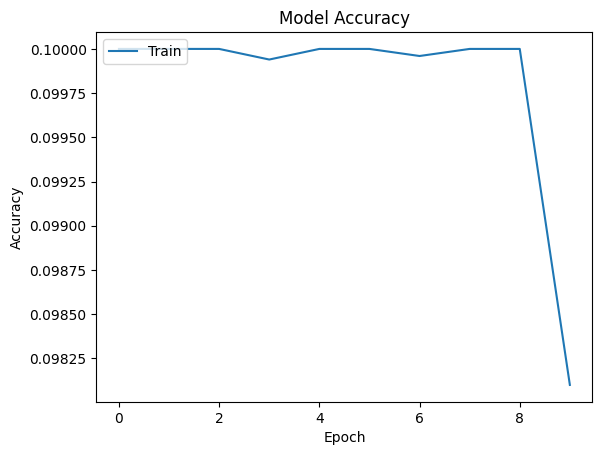

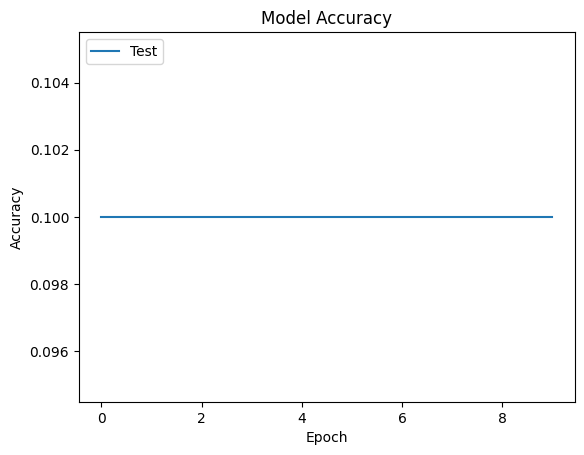

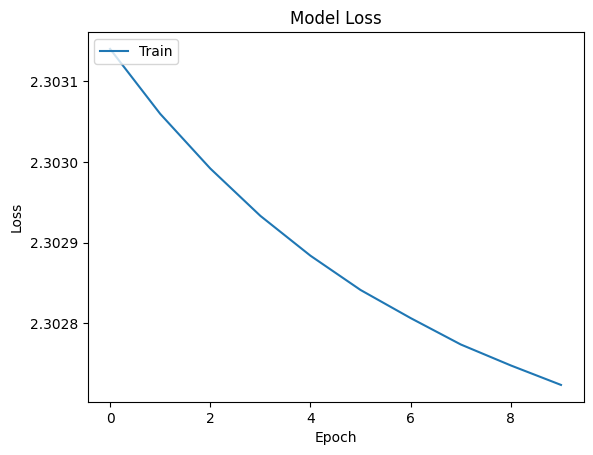

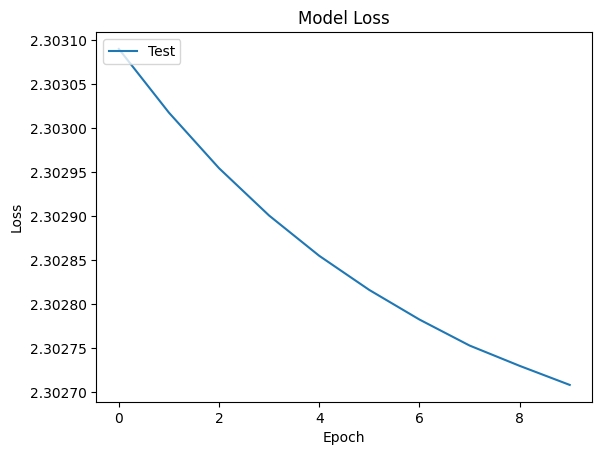

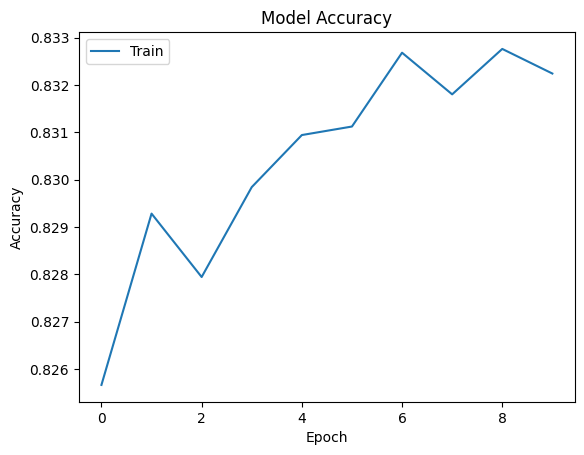

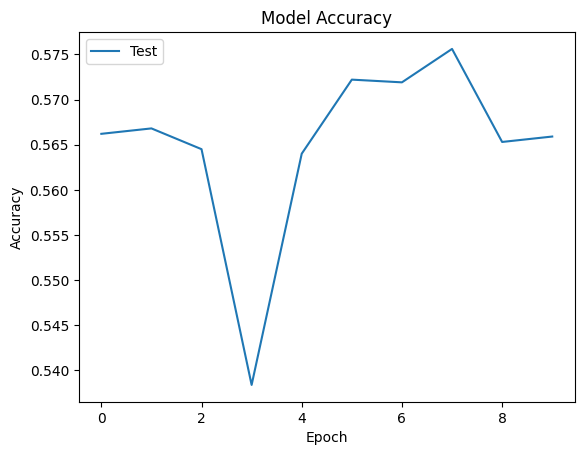

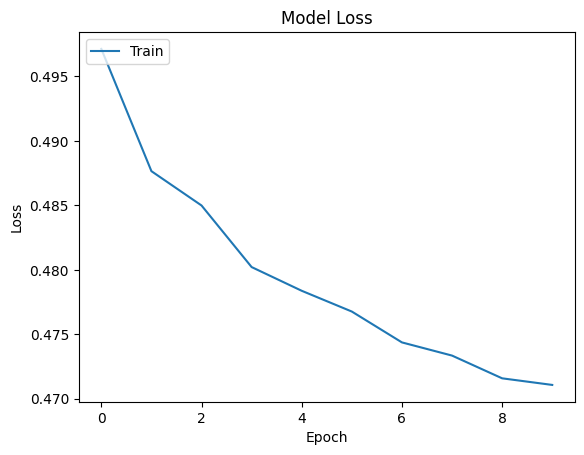

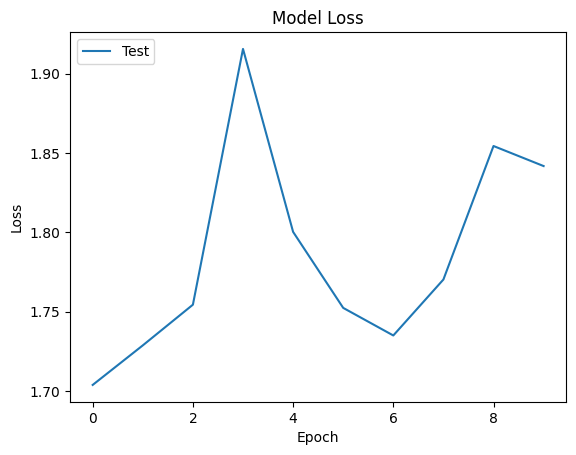

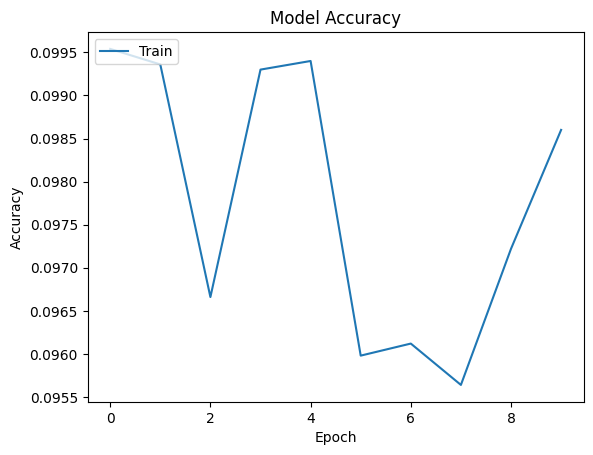

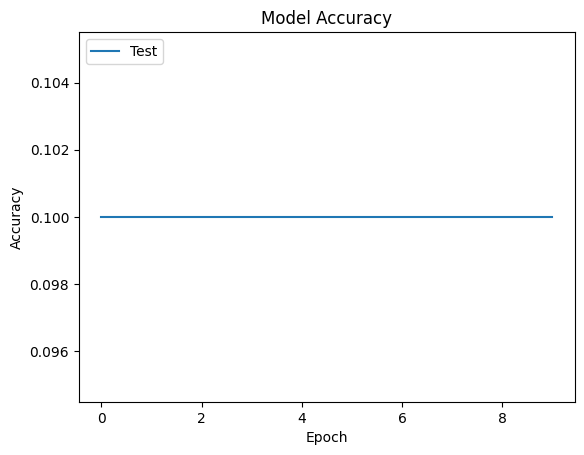

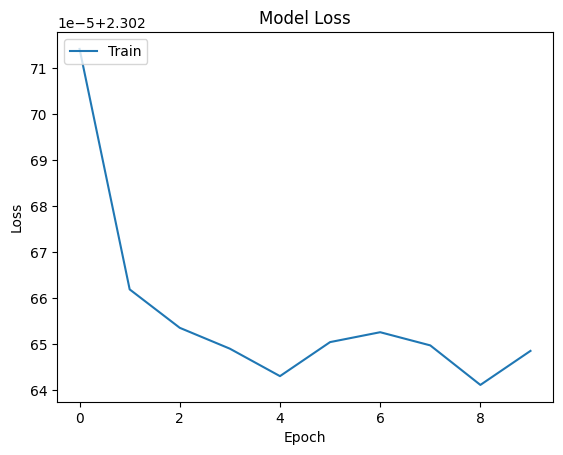

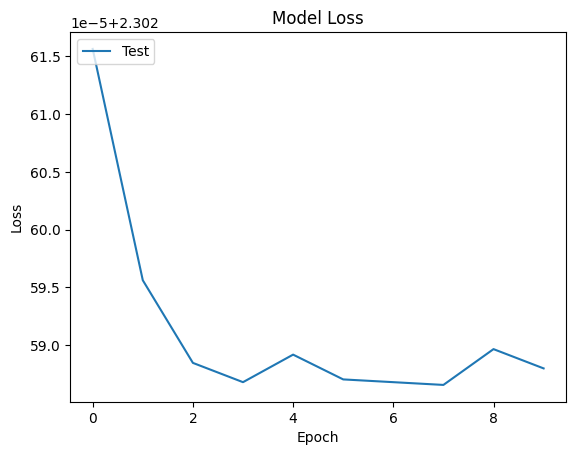

In [13]:
# plot the 8 histories
plot_history(model_1)
plot_history(model_2)
plot_history(model_3)
plot_history(model_4)
plot_history(model_5)
plot_history(model_6)
plot_history(model_7)
plot_history(model_8)